# Social Justice in Programming

This project investigates the level of equal opportunities in the field of professional developers.<br>
Survey results from Stackoverflow, which are freely accessible at https://insights.stackoverflow.com/survey, are used as the data basis.<br><br>
**Note: The notebook does not claim to fully reflect the complexity of this question. It only elaborates on what the Stackoverflow survey results indicate.*

The questions to be answered in this notebook are: 
- Q1 To what extent is there equal opportunity in the programming profession? <br> 
 How well can the salary be predicted on the basis of the starting conditions?
<br><br>
- Q2 How does your social environment influence your chances of being successful as a developer? <br>
<br><br>
- Q3 How important is an open mind and tolerance to succeed as a programmer? <br>
<br><br>
<div style="text-align: left"> To answer these questions, the first step is to analyze the data base in an exploratory manner.


In [95]:
# Necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### Let's get a feel for the data set

In [96]:
# Read in the data
df = pd.read_csv("2017survey_results_public.csv")
schema = pd.read_csv("2017survey_results_schema.csv")
schema.set_index("Column", inplace=True)

In [97]:
# Size of the dataset
print("shape of the data:", df.shape)
print(f"Survey participants: {df.shape[0]}, Questions asked: {df.shape[1]}\n")

# Summary of the df
print(f"df.info:")
print({df.info()})

pd.set_option('display.max_columns', 200)
df.head()

shape of the data: (51392, 154)
Survey participants: 51392, Questions asked: 154

df.info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB
{None}


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

The most interesting columns in regard to the questions are
<br><br><br>
>Q1: To what extent is there equal opportunity in the programming profession?
- **Initial conditons:** Race, HighestEducationParents, Gender
- **Partially influenceable conditions:** Country <br>
*Note: The country is probably strongly related to ethnicity and needs to be considered in the study.*
<br><br>
>Q2: How does your social environment influence your chances of being successful as a developer?
- **Social environment:** HighestEducationParents, FriendsDevelopers
<br><br>
>Q3: How important is an open mind and tolerance to succeed as a programmer?
- **Mindset:** RightWrongWay, DiversityImportant
<br><br><br>
To evaluate whether a developer is successful, the following parameters are evaluated:
- **Evaluation parameters:** JobSatisfaction, CareerSatisfaction, Salary

<br><br>
Of course, these evaluation criteria must take into account whether the survey participant is a professional programmer. <br> 
- **Additional parameters:** Professional


In [98]:
# Columns of interest
INITIAL_CONDITIONS = ["Race", "HighestEducationParents", "Gender"]
PART_INFLUENCEABLE_CONDITIONS = ["Country"]
SOCIAL_ENVIRONMENT = ["HighestEducationParents", "FriendsDevelopers"]
MINDSET = ["RightWrongWay", "DiversityImportant"]
EVALUATION_PARAMETERS = ["JobSatisfaction", "CareerSatisfaction", "Salary"]
ADDITIONAL_PARAMETERS = ["Professional"]

columns_of_interest = list(set([item for list in [INITIAL_CONDITIONS, PART_INFLUENCEABLE_CONDITIONS, SOCIAL_ENVIRONMENT, 
                                                  MINDSET, ADDITIONAL_PARAMETERS, EVALUATION_PARAMETERS] for item in list]))


In [99]:
# Let's take a look at the questions behind the columns
for index, row in schema.loc[columns_of_interest].iterrows():
    question = schema.loc[index, "Question"]
    print(f"{index}: {question}")

HighestEducationParents: What is the highest level of education received by either of your parents?
Professional: Which of the following best describes you?
Salary: What is your current annual base salary, before taxes, and excluding bonuses, grants, or other compensation?
FriendsDevelopers: Most of my friends are developers, engineers, or scientists
JobSatisfaction: Job satisfaction rating
Race: Which of the following do you identify as?
DiversityImportant: Diversity in the workplace is important
CareerSatisfaction: Career satisfaction rating
Country: In which country do you currently live?
RightWrongWay: There's a right and a wrong way to do everything
Gender: Which of the following do you currently identify as?


In [100]:
# Build a df containing only the columns of interest
df_filtered = df[columns_of_interest].copy()
df_filtered.head()

,HighestEducationParents,Professional,Salary,FriendsDevelopers,JobSatisfaction,Race,DiversityImportant,CareerSatisfaction,Country,RightWrongWay,Gender
0,High school,Student,NaN,Disagree,NaN,White or of European descent,Agree,NaN,United States,Somewhat agree,Male
1,A master's degree,Student,NaN,NaN,NaN,White or of European descent,NaN,NaN,United Kingdom,NaN,Male
2,A professional degree,Professional developer,113750.0,Somewhat agree,9.0,White or of European descent,Strongly agree,8.0,United Kingdom,Disagree,Male
3,A doctoral degree,Professional non-developer who sometimes write...,NaN,Agree,3.0,White or of European descent,Agree,6.0,United States,Somewhat agree,Male
4,NaN,Professional developer,NaN,NaN,8.0,NaN,NaN,6.0,Switzerland,NaN,NaN


In [101]:
# Datatypes in the dataset
df_filtered.dtypes

HighestEducationParents     object
Professional                object
Salary                     float64
FriendsDevelopers           object
JobSatisfaction            float64
Race                        object
DiversityImportant          object
CareerSatisfaction         float64
Country                     object
RightWrongWay               object
Gender                      object
dtype: object

In [102]:
# Ditribution of the quantitative parameters
df_filtered.describe()

,Salary,JobSatisfaction,CareerSatisfaction
count,12891.000000,40376.000000,42695.000000
mean,56298.480641,6.957078,7.300574
std,39880.905277,2.167652,1.955444
min,0.000000,0.000000,0.000000
25%,26440.371839,6.000000,6.000000
50%,50000.000000,7.000000,8.000000
75%,80000.000000,8.000000,9.000000
max,197000.000000,10.000000,10.000000


In [103]:
# Proportions of missing evaluation parameters
prop_missing_salary = df_filtered["Salary"].isnull().mean()
prop_missing_jobsf = df_filtered["JobSatisfaction"].isnull().mean()
prop_missing_careersf = df_filtered["CareerSatisfaction"].isnull().mean()
print("Missing evaluation parameters")
print(f"Salary: {round(prop_missing_salary*100, 1)} %")
print(f"JobSatisfaction: {round(prop_missing_jobsf*100, 1)} %")
print(f"CareerSatisfaction: {round(prop_missing_careersf*100, 1)} %")

# Missing evaluation parameters combined
print("\nData left after removing every row with missing evaluation parameters:")
print(f"{round((df_filtered.dropna(subset=EVALUATION_PARAMETERS, axis=0).shape[0]/df.shape[0])*100, 1)} %, -> {df_filtered.dropna(subset=EVALUATION_PARAMETERS, axis=0).shape[0]}")



Missing evaluation parameters
Salary: 74.9 %
JobSatisfaction: 21.4 %
CareerSatisfaction: 16.9 %

Data left after removing every row with missing evaluation parameters:
25.0 %, -> 12847


In [104]:
# Build a df containing only rows with the needed evaluation criteria
df_eval = df_filtered.dropna(subset=EVALUATION_PARAMETERS, axis=0).copy()

In the df df_eval, due to the filtering with the salary, there should be only survey participants whose professional status is professional developer. <br>
This can be easily checked using the "Professional" column.

In [105]:
print(df_eval["Professional"].value_counts())
print(f"shape df_eval: {df_eval.shape}")

Professional developer    12847
Name: Professional, dtype: int64
shape df_eval: (12847, 11)


The df is now filtered so we can take a look at the distribution of the selected parameters in the data set.

In [106]:
# Plot only combinations where there are at least 50 survey participants
ethnicity_counts = df_eval["Race"].value_counts()[df_eval["Race"].value_counts() >=50]

# Plot only combinations where there are at least 400 survey participants
country_counts = df_eval["Country"].value_counts()[df_eval["Country"].value_counts() >=400]

# Plot only combinations where there are at least 10 survey participants
gender_counts = df_eval["Gender"].value_counts()[df_eval["Gender"].value_counts()>=10]

White or of European descent                               8685
South Asian                                                 682
Hispanic or Latino/Latina                                   419
East Asian                                                  308
Middle Eastern                                              212
Hispanic or Latino/Latina; White or of European descent     155
Black or of African descent                                 155
I prefer not to say                                         150
I don’t know                                                131
Middle Eastern; White or of European descent                 66
Name: Race, dtype: int64


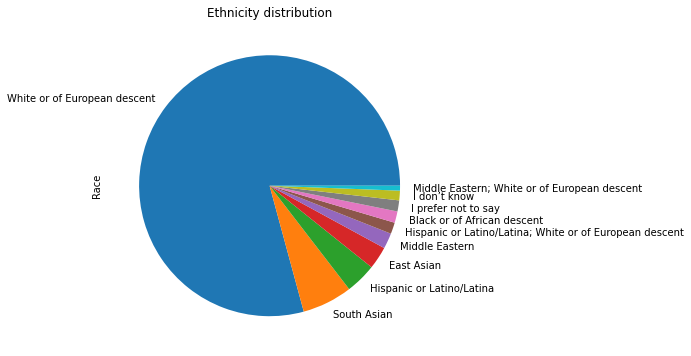

In [107]:
# Default plot for data overview
def do_standard_plot(df, title, plot_type, size=[6,6], use_y_grid=False):
    """[Takes a df containing a distribution and creates a plot from it.]

    Args:
        df ([pandas.DataFrame]): [df containing a distribution]
        title ([str]): [title of the plot]
        size (list, optional): [size of the figure]. Defaults to [8,8].
        size ([bool, optional]): [True for y-grid]. Defaults to False.
    """
    if use_y_grid:
        _, ax = plt.subplots()
    df.plot(kind=plot_type, figsize=size);
    plt.title(title)
    if use_y_grid:
        plt.grid(axis="y")
        ax.set_axisbelow(True)
        plt.ylabel("Survey participants")

# Ethnicity distribution
print(ethnicity_counts)

do_standard_plot(ethnicity_counts, "Ethnicity distribution", "pie")

It is clearly evident that one ethnicity in the chart is clearly overweighted.<br>
Since only ethnicities to which at least 50 survey participants belong are shown here,<br>
it should still be possible to make a reasonably statistically reliable statement with these.<br>
We can neglect the answers 'I prefer not to say' and 'I don't know'. <br><br>
So we focus on the following groups: <br>
*['White or of European descent', 'South Asian',<br>
'Hispanic or Latino/Latina', 'East Asian', 'Middle Eastern',<br>
'Hispanic or Latino/Latina; White or of European descent',<br>
'Black or of African descent', 'Middle Eastern; White or of European descent']*

In [108]:
ethnicities_in_focus = ['White or of European descent', 'South Asian',
                        'Hispanic or Latino/Latina', 'East Asian', 'Middle Eastern',
                        'Hispanic or Latino/Latina; White or of European descent',
                        'Black or of African descent', 'Middle Eastern; White or of European descent']

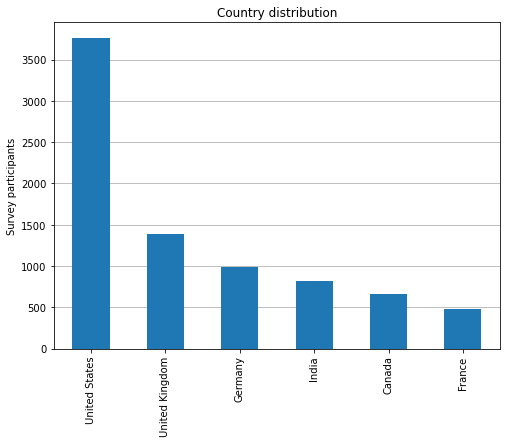

In [109]:
# Country distribution
do_standard_plot(country_counts, "Country distribution", "bar", [8,6], True)

In terms of countries, there is a bias towards the U.S., although the data is much more balanced on this point. <br>
The countries that we want to consider in the evaluation are: <br>
*['United States', 'United Kingdom', 'Germany', 'India', 'Canada', 'France']*

In [110]:
countries_in_focus = list(country_counts.index)

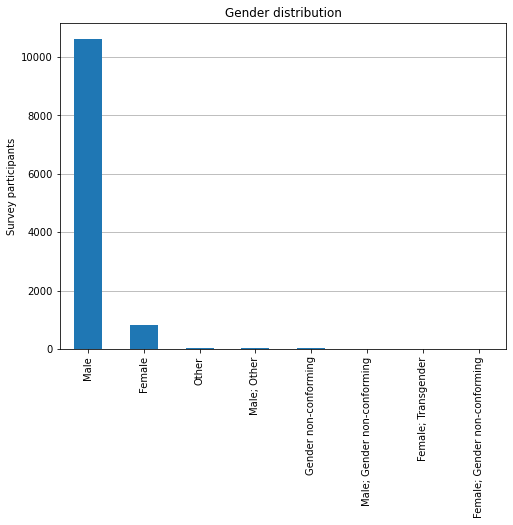

In [111]:
# Gender distribution
do_standard_plot(gender_counts, "Gender distribution", "bar", [8,6], True)


If you look at the gender distribution, you can see, as you would expect, that the profession of developer is strongly dominated by males. <br>
Since we can't make reasonable statements, with too few survey participants for a gender, we will divide this property into 3 groups. <br>
The first two groups are *female* and *male*. All remaining answers are summarized under the term *Other*.<br>

Male      10632
Female      816
Other       222
Name: Gender, dtype: int64


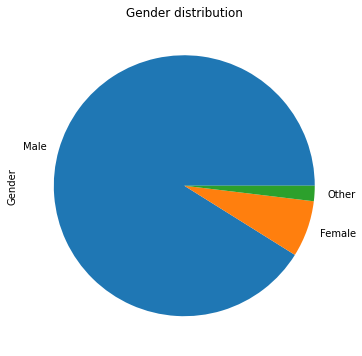

In [112]:
# Disable chained assignments
pd.options.mode.chained_assignment = None # Source: https://stackoverflow.com/questions/49728421/pandas-dataframe-settingwithcopywarning-a-value-is-trying-to-be-set-on-a-copy

# Reworked gender distribution
df_eval["Gender"][[element not in ["Male", "Female", np.nan] for element in df_eval["Gender"]]] = "Other"
print(df_eval["Gender"].value_counts())

do_standard_plot(df_eval["Gender"].value_counts(), "Gender distribution", "pie")


This should be enough for a first overview.<br>
So let's take a look at question number 1: <br>
**Q1 To what extent is there equal opportunity in the programming profession?**<br><br>
*Note: The OverallSatisfaction is introduced as the sum of the job and the career satisfaction*

In [113]:
def add_overall_sf(df):
    """[Adds the OverallSatifsction column to a df as the sum of job and career satisfaction]

    Args:
        df ([pandas.DataFrame]): [Pandas df that contains the columns "JobSatisfaction" and "CareerSatisfaction"]
    """
    df["OverallSatisfaction"] = df["JobSatisfaction"] + df["CareerSatisfaction"]

In [114]:
# Evaluation parameter by ethnicity
ethnicity_satifaction = df_eval.groupby("Race").mean().loc[ethnicities_in_focus].sort_values("Salary", ascending=False)
add_overall_sf(ethnicity_satifaction)
ethnicity_satifaction

,Salary,JobSatisfaction,CareerSatisfaction,OverallSatisfaction
Race,,,,
Middle Eastern; White or of European descent,69035.926739,7.090909,7.575758,14.666667
White or of European descent,61582.525312,7.057110,7.559125,14.616235
Hispanic or Latino/Latina; White or of European descent,60179.626160,7.219355,7.741935,14.961290
East Asian,52027.612807,6.779221,7.113636,13.892857
Black or of African descent,50068.650250,6.187097,7.212903,13.400000
Hispanic or Latino/Latina,41648.064699,7.248210,8.069212,15.317422
Middle Eastern,37802.317456,6.849057,7.537736,14.386792
South Asian,30528.177506,6.373900,7.076246,13.450147


The table shows that a low salary does not necessarily mean low satisfaction.<br> 
The salary varies so significantly that in the next step we have to take the countries into account. <br>
It is important to note that different countries have different salary levels and that there is an uneven distribution of ethnic groups across countries.


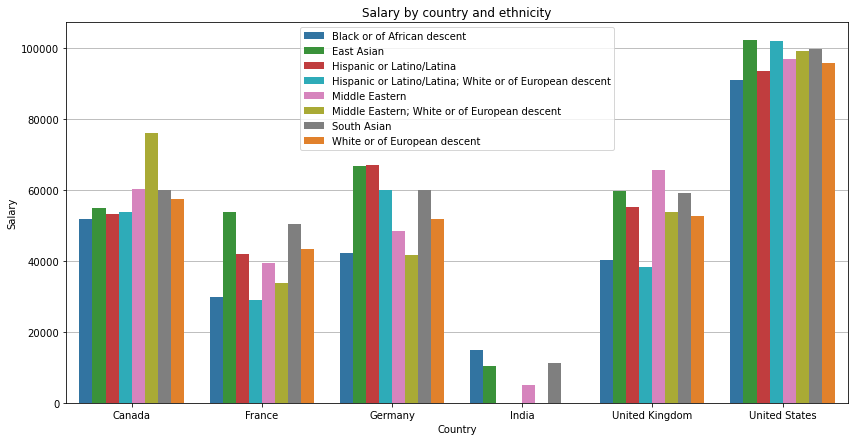

In [115]:
def plot_multiple_bar_plot(data, x="Country", y="Salary", hue="Race", title="Salary by country and ethnicity", 
                           palette=["tab:blue","tab:green","tab:red","tab:cyan","tab:pink","tab:olive","tab:gray","tab:orange"]):
    """[Creates a plot in which each x-tick is divided again using several bars in different colors]

    Args:
        data ([pandas.DataFrame]): [A df containing the x-ticks, the categories for the hues, and the corresponding y-values]
        x (str, optional): [Name of the column with the values for the x-ticks]. Defaults to "Country".
        y (str, optional): [Name of the column with the values for the y-axis]. Defaults to "Salary".
        hue (str, optional): [Name of the column with the categories that are divided into different colored bars.]. Defaults to "Race".
        title (str, optional): [Title of the plot]. Defaults to "Salary by country and ethnicity".
        palette (list, optional): [seaborn.color_palette or list of matplotlib colors.]. Defaults to ["tab:blue","tab:green","tab:red",
                                                                                                      "tab:cyan","tab:pink","tab:olive",
                                                                                                      "tab:gray","tab:orange"].
    """
    _, ax = plt.subplots()
    sns.barplot(x=x, y=y, hue=hue, data=data, palette=palette)
    plt.gcf().set_size_inches(14, 7)
    plt.legend(loc="upper center")
    plt.title(title)
    plt.grid(axis="y")
    ax.set_axisbelow(True)


# Plot salary by country and ethnicity
ethnicity_sf_countries = df_eval.groupby(["Race", "Country"], as_index=False)[EVALUATION_PARAMETERS].mean()

# Select only ethnicities and countries in focus
ethnicity_sf_countries_if = ethnicity_sf_countries[(ethnicity_sf_countries["Race"].isin(ethnicities_in_focus)) & 
                                                   (ethnicity_sf_countries["Country"].isin(countries_in_focus))]

plot_multiple_bar_plot(ethnicity_sf_countries_if)


We can quickly see that there is not enough data available for India, so the plot is made again without India.

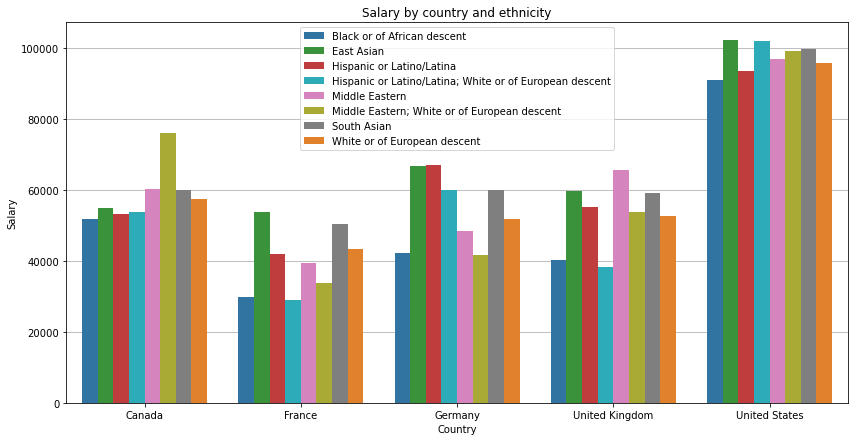

In [116]:
# Select only ethnicities and countries in focus - wihtout India
countries_in_focus_no_india = countries_in_focus.copy()
countries_in_focus_no_india.remove("India")

ethnicity_sf_countries_if_mod = ethnicity_sf_countries[(ethnicity_sf_countries["Race"].isin(ethnicities_in_focus)) & 
                                                   (ethnicity_sf_countries["Country"].isin(countries_in_focus_no_india))]


plot_multiple_bar_plot(ethnicity_sf_countries_if_mod)

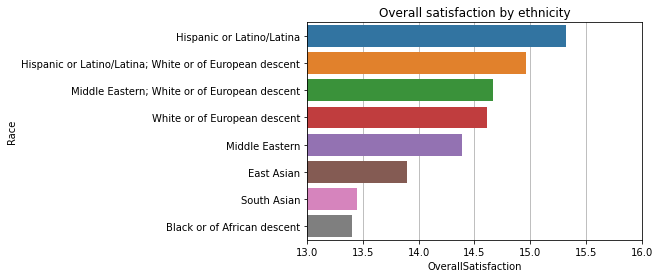

In [117]:
# Standard diagram for the visualisation of the distribution of the evaluation parameters
def plot_eval_param_dist(df, title, parameter, x_lim=[13, 16], palette=sns.color_palette()):
    """[Plots the distribution of a parameter in a bar chart]

    Args:
        df ([pandas.DataFrame]): [A df containing a distribution over "parameter"]
        title ([str]): [Title of the plot]
        parameter ([str]): [Evaluation parameter to plot]
        x_lim (list, optional): [x-Axis limit of the plot]. Defaults to [12, 16].
        palette (list, optional): [seaborn.color_palette or list of matplotlib colors.]. Defaults to sns.color_palette().
    """
    df.sort_values(parameter, ascending=False, inplace=True)
    _, ax = plt.subplots()
    sns.barplot(x=df[parameter], y=df.index, palette=palette)
    plt.title(title)
    plt.xlim(x_lim)
    plt.grid(axis="x")
    ax.set_axisbelow(True)
    

# Plot overall satisfaction by ethnicity
plot_eval_param_dist(ethnicity_satifaction, "Overall satisfaction by ethnicity", "OverallSatisfaction")

In order to see which parameters affect general satisfaction and to what extent, <br>
the ranges between maximum and minimum satisfaction are stored in a dict.

In [118]:
range_oa_sf = {}
def save_range_in_oa_sf(df, parameter):
    """[The function saves the range between maximum and minimum OverallSatisfaction depending on the category/parameter in a dict.]

    Args:
        df ([pandas.DataFrame]): [A df containing a distribution over the OverallSatisfaction]
        parameter ([str]): [The category to which the distribution belongs]
    """
    global range_oa_sf
    range_oa_sf[parameter] = round(df["OverallSatisfaction"].max()-df["OverallSatisfaction"].min(),2)


# Safe range 
save_range_in_oa_sf(ethnicity_satifaction, "Ethnicity")

In [119]:
# Available data HighestEducationParents
available_data_hep = len(df_eval["HighestEducationParents"]) - sum(df_eval["HighestEducationParents"].isnull())
print(f"Available data HighestEducationParents: {available_data_hep}")

# Evaluation parameter by HighestEducationParents
pe_satifaction = df_eval.groupby("HighestEducationParents").mean().sort_values("Salary", ascending=False)
add_overall_sf(pe_satifaction)
pe_satifaction

Available data HighestEducationParents: 11665


,Salary,JobSatisfaction,CareerSatisfaction,OverallSatisfaction
HighestEducationParents,,,,
A doctoral degree,68414.472092,7.185484,7.553226,14.738710
A professional degree,64326.306664,6.998182,7.480000,14.478182
A master's degree,60409.909827,7.033951,7.522377,14.556327
"Some college/university study, no bachelor's degree",59926.831012,6.996900,7.663360,14.660260
A bachelor's degree,57102.290990,6.945182,7.494773,14.439955
High school,50924.049281,6.899902,7.463867,14.363770
I don't know/not sure,49553.558412,6.898204,7.233533,14.131737
I prefer not to answer,45081.722501,6.861538,7.523077,14.384615
Primary/elementary school,39351.855125,6.733656,7.246973,13.980630


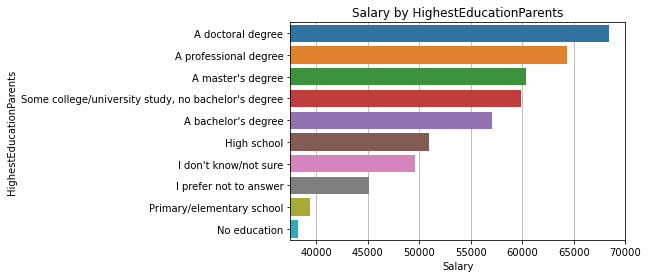

In [120]:
# Plot salary by HighestEducationParents
plot_eval_param_dist(pe_satifaction, "Salary by HighestEducationParents", "Salary", x_lim=[37500,70000])

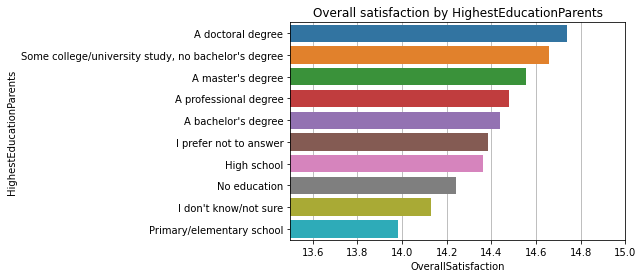

In [122]:
# Plot overall satisfaction by HighestEducationParents
plot_eval_param_dist(pe_satifaction, "Overall satisfaction by HighestEducationParents", "OverallSatisfaction", x_lim=[13.5,15])

# Save satisfaction range for HighestEducationParents
save_range_in_oa_sf(pe_satifaction, "HighestEducationParents")

In [77]:
# Evaluation parameter by Gender
gender_satifaction = df_eval.groupby("Gender").mean().sort_values("Salary", ascending=False)
add_overall_sf(gender_satifaction)
gender_satifaction

,Salary,JobSatisfaction,CareerSatisfaction,OverallSatisfaction
Gender,,,,
Other,61633.921918,6.576577,7.162162,13.738739
Female,57969.628276,6.985294,7.409314,14.394608
Male,56924.546269,6.977897,7.525677,14.503574


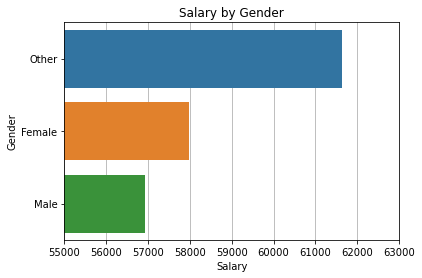

In [78]:
# Plot salary by Gender
plot_eval_param_dist(gender_satifaction, "Salary by Gender", "Salary", x_lim=[55000,63000])

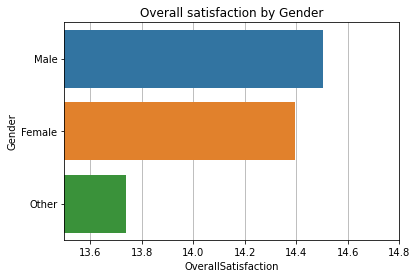

In [124]:
# Plot overall satisfaction by Gender
plot_eval_param_dist(gender_satifaction, "Overall satisfaction by Gender", "OverallSatisfaction", x_lim=[13.5,14.8])

# Save satisfaction range for Gender
save_range_in_oa_sf(gender_satifaction, "Gender")

In [80]:
# todo: prediction machen
range_oa_sf

{'Ethnicity': 1.92, 'HighestEducationParents': 0.76, 'Gender': 0.76}

Let's continue with question 2: <br>
**Q2 How does your social environment influence your chances of being successful as a developer?**<br><br>
We have already seen clearly that the parents education not only has an extreme impact on salary, but also on job satisfaction.<br>
Now we have to check how the circle of friends affect the success. Here, however, it must be taken into account that a correlation does not necessarily mean a causality.<br>
If you are successful as a programmer, you have a lot to do with other developers and the probability is high that you will find new friends among them.<br>
In addition, many friendships are made during an academic career and people with high degrees tend to earn higher incomes.

In [81]:
# Available data FriendsDevelopers
available_data_fd = len(df_eval["FriendsDevelopers"]) - sum(df_eval["FriendsDevelopers"].isnull())
print(f"Available data FriendsDevelopers: {available_data_fd}")

# Evaluation parameter by FriendsDevelopers
friends_dev_satifaction = df_eval.groupby("FriendsDevelopers").mean().sort_values("Salary", ascending=False)
add_overall_sf(friends_dev_satifaction)
friends_dev_satifaction

Available data FriendsDevelopers: 8847


,Salary,JobSatisfaction,CareerSatisfaction,OverallSatisfaction
FriendsDevelopers,,,,
Disagree,60290.451849,7.024182,7.556188,14.580370
Somewhat agree,56516.277812,6.952104,7.492390,14.444494
Strongly disagree,55530.701540,6.959770,7.436782,14.396552
Agree,53857.007633,6.874416,7.447246,14.321662
Strongly agree,52200.128657,6.978454,7.539924,14.518378


The table shows that the general level of satisfaction is very balanced. <br> What is more interesting for a graphical visualisation is the correlation between social circle and salary.

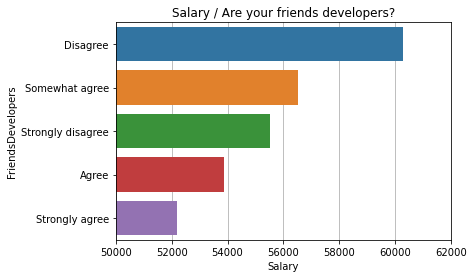

In [82]:
# Plot salary in relation to friends from the same professional field
plot_eval_param_dist(friends_dev_satifaction, "Salary / Are your friends developers?", "Salary", x_lim=[50000,62000])

Contrary to my original assumption, we can see from the graph that people whose circle of friends includes few developers have the highest salary. <br>
The people who mainly surround themselves with developers earn even the lowest salary.

Finally, we continue with question 3:<br>
**Q3 How important is an open mind and tolerance to succeed as a programmer?**

In [83]:
# Available data RightWrongWay
available_data_rw = len(df_eval["RightWrongWay"]) - sum(df_eval["RightWrongWay"].isnull())
print(f"Available data RightWrongWay: {available_data_rw}")

# Evaluation parameter by RightWrongWay
right_wrong_satifaction = df_eval.groupby("RightWrongWay").mean().sort_values("Salary", ascending=False)
add_overall_sf(right_wrong_satifaction)
right_wrong_satifaction

Available data RightWrongWay: 8830


,Salary,JobSatisfaction,CareerSatisfaction,OverallSatisfaction
RightWrongWay,,,,
Strongly disagree,64572.123211,7.134467,7.548686,14.683153
Disagree,63007.050758,7.028583,7.469945,14.498529
Somewhat agree,60474.853731,6.974341,7.529251,14.503592
Agree,49374.558330,6.925117,7.523661,14.448778
Strongly agree,38073.552483,6.698330,7.393528,14.091858


As with the circle of friends, this parameter does not have a high impact on satisfaction. <br>
It remains to be said, however, that the people who believe that there is a right and wrong way for everything are the most unsatisfied.<br>
In terms of salary, the more open a developer is to different solutions, the higher the salary he achieves. 


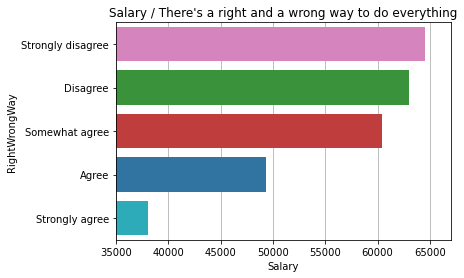

In [84]:
# Plot the relation of salary to whether people believe there is a right way and a wrong way to do everything
plot_eval_param_dist(right_wrong_satifaction, "Salary / There's a right and a wrong way to do everything", "Salary", x_lim=[35000,67000], 
                     palette=["tab:pink","tab:green","tab:red","tab:blue","tab:cyan"])

Since the difference in salary is so significant, we should look at this again in a country comparison.

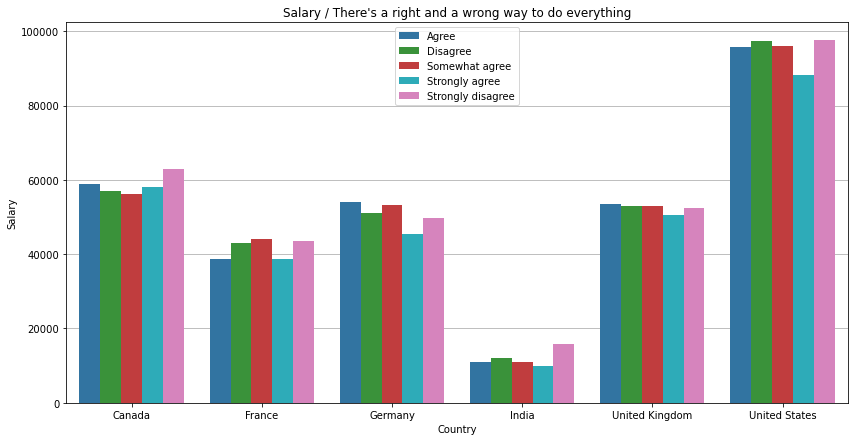

In [85]:
# Plot salary by country and RightWrongWay
right_wrong_sf_countries = df_eval.groupby(["RightWrongWay", "Country"], as_index=False)[EVALUATION_PARAMETERS].mean()

# Select only countries in focus
right_wrong_sf_countries_if = right_wrong_sf_countries[right_wrong_sf_countries["Country"].isin(countries_in_focus)]

plot_multiple_bar_plot(right_wrong_sf_countries_if, hue="RightWrongWay", title="Salary / There's a right and a wrong way to do everything")

We can see that in all the countries considered, people who believe that there is only one right way to solve a problem earn less than those who strongly reject this belief.

In [86]:
# Available data DiversityImportant
available_data_di = len(df_eval["DiversityImportant"]) - sum(df_eval["DiversityImportant"].isnull())
print(f"Available data DiversityImportant: {available_data_di}")

# Evaluation parameter by DiversityImportant
diversity_imp_satifaction = df_eval.groupby("DiversityImportant").mean().sort_values("Salary", ascending=False)
add_overall_sf(diversity_imp_satifaction)
diversity_imp_satifaction

Available data DiversityImportant: 8833


,Salary,JobSatisfaction,CareerSatisfaction,OverallSatisfaction
DiversityImportant,,,,
Strongly disagree,63195.713791,6.687117,7.260736,13.947853
Strongly agree,61762.894720,7.078532,7.619968,14.698500
Disagree,57684.292744,6.809929,7.358865,14.168794
Agree,53805.346354,6.948568,7.487527,14.436095
Somewhat agree,53270.827345,6.919842,7.455715,14.375557


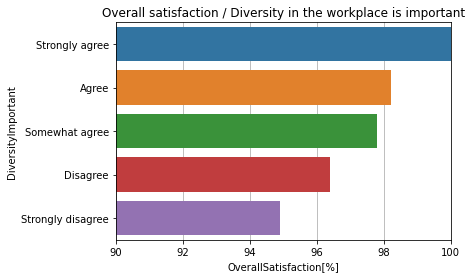

In [87]:
# Plot the relation of overall satisfaction to whether people believe that Diversity in the workplace is important in percent
diversity_imp_satifaction.sort_values("OverallSatisfaction", ascending=False, inplace=True)
_, ax = plt.subplots()
sns.barplot(x=100*(diversity_imp_satifaction["OverallSatisfaction"]/max(diversity_imp_satifaction["OverallSatisfaction"])), y=diversity_imp_satifaction.index)
plt.title("Overall satisfaction / Diversity in the workplace is important")
plt.xlabel("OverallSatisfaction[%]")
plt.xlim([90, 100])
plt.grid(axis="x")
ax.set_axisbelow(True)

On the question of whether diversity is important in the workplace, it appears that people with a clear opinion on this earn the most. <br>
The group that is strongly opposed to diversity has an average income that is about €1500 higher, but is also more than 5% less satisfied.